## Decomposition Exercise

In [1]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt


In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print the top 5 rows

In [4]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [9]:
co2.shape

(2284, 1)

* Resample the time series using monthly averages and store the new time series as a Series `y`.

In [10]:
y = co2.resample('M').mean()

* print the top 5 rows of 'y'

In [12]:
y.head(5)

,co2
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-06-30,NaN
1958-07-31,315.625000


* check for missing values

In [17]:
y.isna().sum()

co2    5
dtype: int64

* replace missing values with last available value


    - Example: If Feb 2010 is missing, use the value from Jan 2010.

In [30]:
import numpy as np
prev = 0 
for i in range(y.shape[0]):
    if y.iloc[i].isnull().all():
        y.iloc[i] = prev
    prev = y.iloc[i]

In [ ]:
y.isnull().sum()

* plot the time series `y`

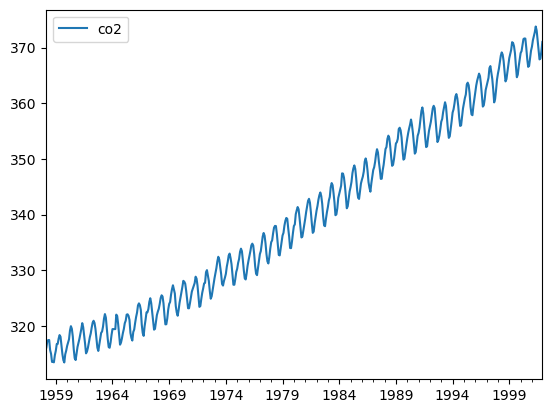

In [32]:
y.plot()
plt.show()

* Apply and plot the following:


    1. additive seasonal decomposition
    2. multiplicative seasonal decomposition

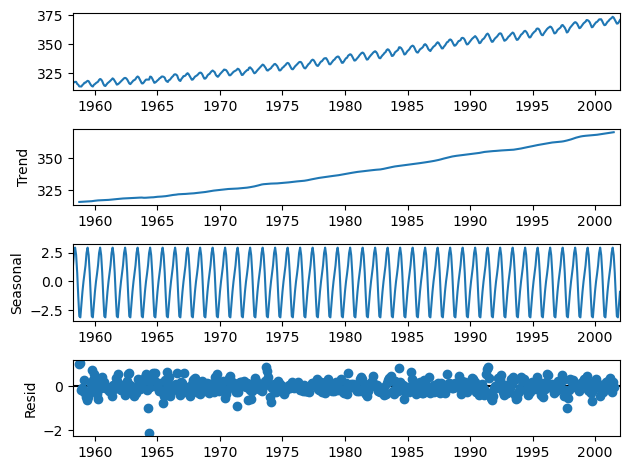

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive = seasonal_decompose(y, model='additive')
additive.plot()
plt.show()

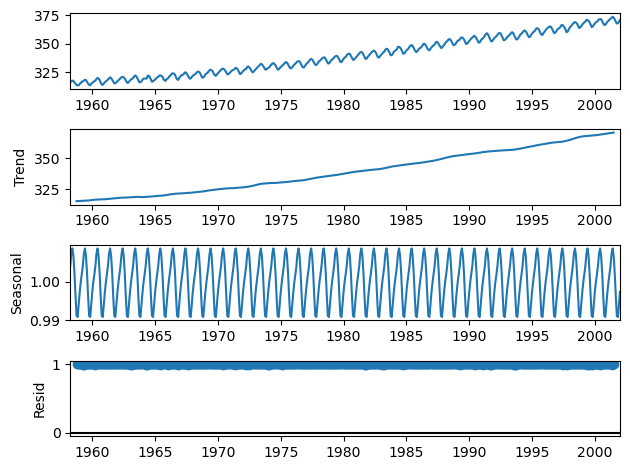

In [38]:
multi = seasonal_decompose(y, model='multiplicative')
multi.plot()
plt.show()